In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [2]:
th232_chain = pd.read_csv("data/raw_sources_IO/Th232_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (th232_chain.head(10))

th232_chain_hang = pd.read_csv("data/raw_sources_IO/Th232_Hang_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (th232_chain_hang.head(10))


   Energy           a,n          S.F.         Total
0    10.0  1.416000e-14  1.576000e-19  1.416000e-14
1     9.9  1.564000e-14  1.779000e-19  1.564000e-14
2     9.8  1.721000e-14  2.019000e-19  1.721000e-14
3     9.7  1.886000e-14  2.289000e-19  1.886000e-14
4     9.6  2.057000e-14  2.575000e-19  2.057000e-14
5     9.5  2.233000e-14  2.922000e-19  2.233000e-14
6     9.4  2.494000e-14  3.291000e-19  2.494000e-14
7     9.2  4.041000e-14  4.207000e-19  4.042000e-14
8     9.1  4.996000e-14  4.753000e-19  4.996000e-14
9     9.0  5.990000e-14  5.364000e-19  5.990000e-14
   Energy           a,n          S.F.         Total
0    10.0  1.369000e-14  1.576000e-19  1.369000e-14
1     9.9  1.512000e-14  1.779000e-19  1.512000e-14
2     9.8  1.663000e-14  2.019000e-19  1.663000e-14
3     9.7  1.821000e-14  2.289000e-19  1.821000e-14
4     9.6  1.984000e-14  2.575000e-19  1.984000e-14
5     9.5  2.153000e-14  2.922000e-19  2.153000e-14
6     9.4  2.405000e-14  3.291000e-19  2.405000e-14
7     9.2  3

/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_77458/3101864980.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  th232_chain = pd.read_csv("data/raw_sources_IO/Th232_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_77458/3101864980.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  th232_chain_hang = pd.read_csv("data/raw_sources_IO/Th232_Hang_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \


In [3]:
th232_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_Th.txt", skiprows=1, engine='python', names=['Energy','Total'], \
                         delim_whitespace=False)
print (th232_hang.head(10))

   Energy         Total
0  0.0161  1.612900e-09
1  0.0241  1.612800e-09
2  0.0241  1.601300e-09
3  0.0241  1.589800e-09
4  0.0241  1.578300e-09
5  0.0241  1.566800e-09
6  0.0241  1.555200e-09
7  0.0241  1.543700e-09
8  0.0241  1.532200e-09
9  0.0161  1.532200e-09


/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_77458/2598035741.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  th232_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_Th.txt", skiprows=1, engine='python', names=['Energy','Total'], \


In [4]:
th232chainEn = np.asarray(th232_chain['Energy'],dtype=float)
th232chainRn = np.asarray(th232_chain['Total'],dtype=float)
th232chainANRn = np.asarray(th232_chain['a,n'],dtype=float)
th232chainEn_HangRetry = np.asarray(th232_chain_hang['Energy'],dtype=float)
th232chainRn_HangRetry = np.asarray(th232_chain_hang['Total'],dtype=float)
th232chainANRn_HangRetry = np.asarray(th232_chain_hang['a,n'],dtype=float)
th232hangEn = np.asarray(th232_hang['Energy'],dtype=float)
th232hangRn = np.asarray(th232_hang['Total'],dtype=float)



print(np.shape(th232chainEn))
print(np.shape(th232chainRn))
print(np.max(np.diff(th232hangEn)))

(87,)
(87,)
0.00820000000000043


[1.416e-14 1.564e-14 1.721e-14 1.886e-14 2.057e-14 2.233e-14 2.494e-14
 4.042e-14 4.996e-14 5.990e-14 7.058e-14 8.283e-14 9.716e-14 1.114e-13
 1.476e-13 1.667e-13 1.879e-13 2.108e-13 2.344e-13 2.603e-13 2.869e-13
 3.458e-13 3.828e-13 4.296e-13 4.808e-13 5.437e-13 6.131e-13 6.825e-13
 8.918e-13 1.009e-12 1.131e-12 1.265e-12 1.410e-12 1.574e-12 1.739e-12
 2.122e-12 2.333e-12 2.557e-12 2.890e-12 3.265e-12 3.643e-12 4.036e-12
 5.313e-12 6.008e-12 6.788e-12 7.710e-12 8.823e-12 1.006e-11 1.139e-11
 1.457e-11 1.642e-11 1.852e-11 2.081e-11 2.286e-11 2.527e-11 2.771e-11
 3.338e-11 3.628e-11 3.915e-11 4.241e-11 4.549e-11 4.830e-11 5.164e-11
 6.007e-11 6.448e-11 6.932e-11 7.404e-11 7.924e-11 8.446e-11 8.998e-11
 1.010e-10 1.055e-10 1.097e-10 1.139e-10 1.174e-10 1.207e-10 1.231e-10
 1.249e-10 1.251e-10 1.257e-10 1.262e-10 1.255e-10 1.237e-10 1.206e-10
 1.024e-10 8.506e-11 6.256e-11]
0.09999999999999964
0.09999999999999964


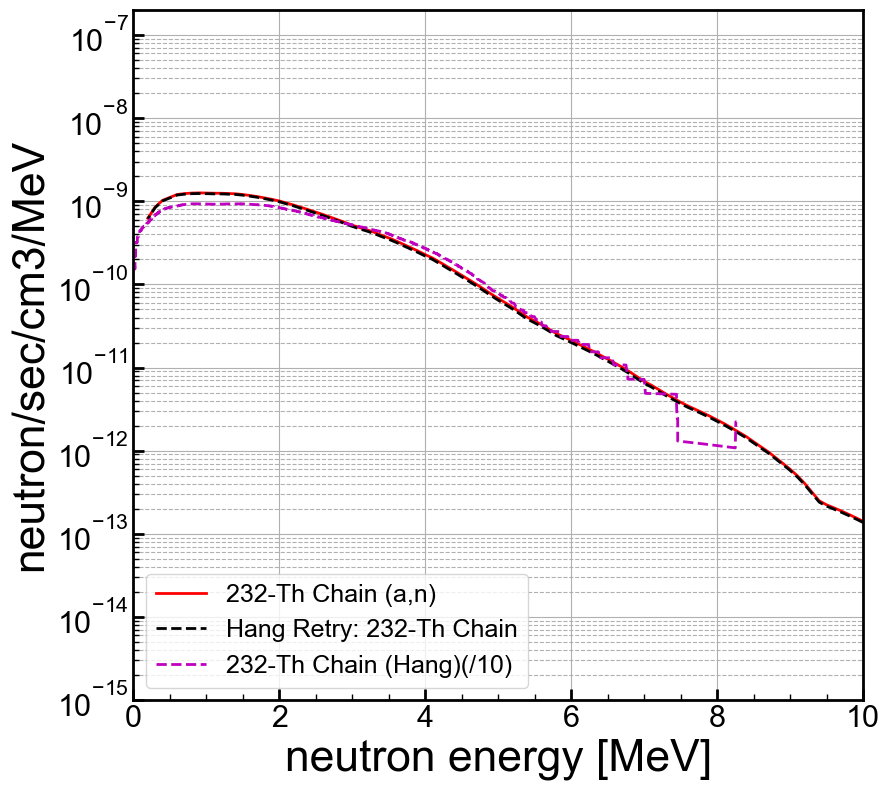

In [5]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(th232chainRn)

width=np.abs(np.diff(th232chainEn)[0])
widthH=np.abs(np.diff(th232hangEn)[0])
widthHR=np.abs(np.diff(th232chainEn_HangRetry)[0])

print(width)
print(widthHR)



#ax1.plot(th232chainEn, 21.097*th232chainRn/width,color='k',linestyle='-',label="232-Th Chain")
ax1.plot(th232chainEn, th232chainANRn/width,color='r',linestyle='-',label="232-Th Chain (a,n)")
ax1.plot(th232chainEn, th232chainRn_HangRetry/widthHR,color='k',linestyle='--',label="Hang Retry: 232-Th Chain")
#ax1.plot(th232chainEn, th232chainANRn_HangRetry/widthHR,color='r',linestyle='--',label="Hang Retry: 232-Th Chain (a,n)")
#ax1.plot(th232hangEn, th232hangRn/200,color='m',linestyle='-',label="232-Th Chain (Hang)(/200)")
ax1.plot(th232hangEn, th232hangRn/10,color='m',linestyle='--',label="232-Th Chain (Hang)(/10)")


#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-15
ymax = 2e-7


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [6]:
u238_chain = pd.read_csv("data/raw_sources_IO/U238_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (u238_chain.head(10))

u235_chain = pd.read_csv("data/raw_sources_IO/U235_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (u235_chain.head(10))

   Energy           a,n          S.F.         Total
0    10.0  1.237000e-14  3.821000e-14  5.058000e-14
1     9.9  1.932000e-14  4.270000e-14  6.202000e-14
2     9.8  2.663000e-14  4.778000e-14  7.441000e-14
3     9.7  3.416000e-14  5.348000e-14  8.764000e-14
4     9.6  4.197000e-14  5.985000e-14  1.018000e-13
5     9.5  5.041000e-14  6.683000e-14  1.172000e-13
6     9.4  5.917000e-14  7.489000e-14  1.341000e-13
7     9.2  7.746000e-14  9.351000e-14  1.710000e-13
8     9.1  8.697000e-14  1.044000e-13  1.914000e-13
9     9.0  9.676000e-14  1.167000e-13  2.134000e-13
   Energy           a,n          S.F.         Total
0    10.0  2.025000e-13  3.000000e-15  2.055000e-13
1     9.9  2.783000e-13  3.295000e-15  2.816000e-13
2     9.8  4.129000e-13  3.620000e-15  4.165000e-13
3     9.7  5.590000e-13  3.976000e-15  5.630000e-13
4     9.6  7.102000e-13  4.366000e-15  7.146000e-13
5     9.5  8.671000e-13  4.791000e-15  8.719000e-13
6     9.4  1.028000e-12  5.261000e-15  1.033000e-12
7     9.2  1

/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_77458/1251044759.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  u238_chain = pd.read_csv("data/raw_sources_IO/U238_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_77458/1251044759.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  u235_chain = pd.read_csv("data/raw_sources_IO/U235_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \


In [7]:
UAN_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_UAN.txt", skiprows=1, engine='python', names=['Energy','Total'], \
                         delim_whitespace=False)
print (UAN_hang.head(10))

USF_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_USF.txt", skiprows=1, engine='python', names=['Energy','Total'], \
                         delim_whitespace=False)
print (USF_hang.head(10))


   Energy         Total
0  0.0522  7.043000e-12
1  0.0596  7.043000e-12
2  0.0596  6.989200e-12
3  0.0596  6.935500e-12
4  0.0596  6.881700e-12
5  0.0596  6.828000e-12
6  0.0596  6.774200e-12
7  0.0596  6.720400e-12
8  0.0596  6.666700e-12
9  0.0596  6.612900e-12
   Energy         Total
0  0.0671  5.860200e-12
1  0.0746  5.860200e-12
2  0.0820  5.860200e-12
3  0.0746  5.806500e-12
4  0.0746  5.752700e-12
5  0.0746  5.698900e-12
6  0.0746  5.645200e-12
7  0.0671  5.645200e-12
8  0.0671  5.698900e-12
9  0.0671  5.752700e-12


/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_77458/1890607956.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  UAN_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_UAN.txt", skiprows=1, engine='python', names=['Energy','Total'], \
/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_77458/1890607956.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  USF_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_USF.txt", skiprows=1, engine='python', names=['Energy','Total'], \


In [8]:
u238chainEn = np.asarray(u238_chain['Energy'],dtype=float)
u238chainRn = np.asarray(u238_chain['Total'],dtype=float)
u238chainANRn = np.asarray(u238_chain['a,n'],dtype=float)
u238chainSFRn = np.asarray(u238_chain['S.F.'],dtype=float)
print(u238chainEn)

u235chainEn = np.asarray(u235_chain['Energy'],dtype=float)
u235chainRn = np.asarray(u235_chain['Total'],dtype=float)
u235chainANRn = np.asarray(u235_chain['a,n'],dtype=float)
u235chainSFRn = np.asarray(u235_chain['S.F.'],dtype=float)

uANhangEn = np.asarray(UAN_hang['Energy'],dtype=float)
uANhangRn = np.asarray(UAN_hang['Total'],dtype=float)

uSFhangEn = np.asarray(USF_hang['Energy'],dtype=float)
uSFhangRn = np.asarray(USF_hang['Total'],dtype=float)


print(np.shape(u238chainEn))
print(np.shape(u238chainRn))
print(np.max(np.diff(uANhangEn)))
print(np.max(np.diff(uSFhangEn)))

[10.   9.9  9.8  9.7  9.6  9.5  9.4  9.2  9.1  9.   8.9  8.8  8.7  8.6
  8.4  8.3  8.2  8.1  8.   7.9  7.8  7.6  7.5  7.4  7.3  7.2  7.1  7.
  6.8  6.7  6.6  6.5  6.4  6.3  6.2  6.   5.9  5.8  5.7  5.6  5.5  5.4
  5.2  5.1  5.   4.9  4.8  4.7  4.6  4.4  4.3  4.2  4.1  4.   3.9  3.8
  3.6  3.5  3.4  3.3  3.2  3.1  3.   2.8  2.7  2.6  2.5  2.4  2.3  2.2
  2.   1.9  1.8  1.7  1.6  1.5  1.4  1.2  1.1  1.   0.9  0.8  0.7  0.6
  0.4  0.3  0.2]
(87,)
(87,)
0.007600000000000051
0.007600000000000051


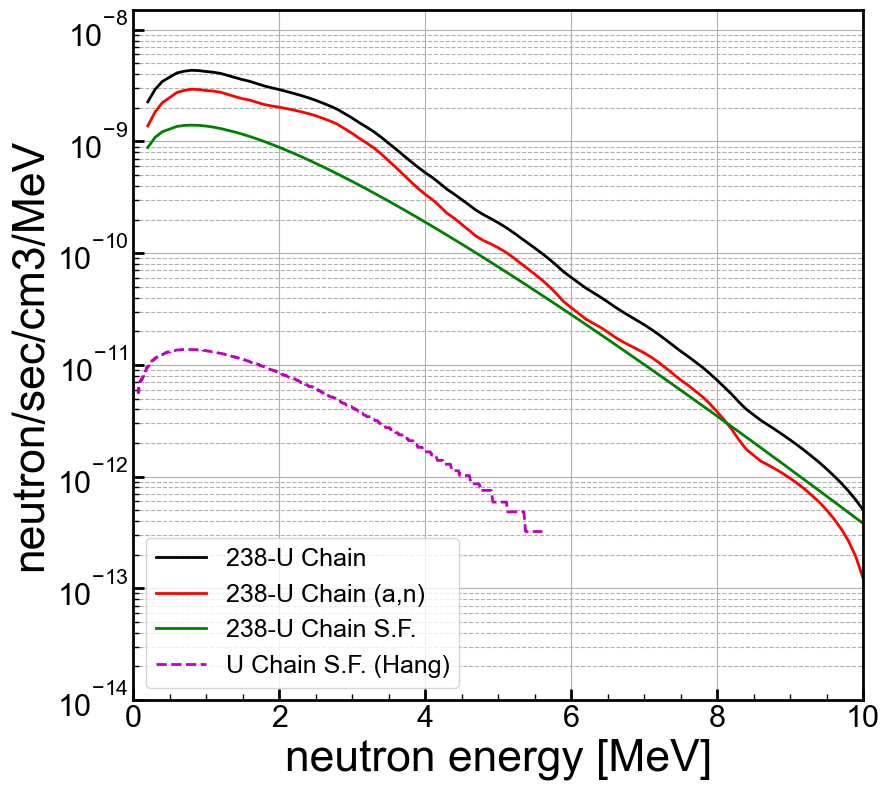

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


width=np.abs(np.diff(u238chainEn)[0])
widthH=np.max(np.diff(uANhangEn))
      


ax1.plot(u238chainEn, u238chainRn/width,color='k',linestyle='-',label="238-U Chain")
ax1.plot(u238chainEn, u238chainANRn/width,color='r',linestyle='-',label="238-U Chain (a,n)")
ax1.plot(u238chainEn, u238chainSFRn/width,color='g',linestyle='-',label="238-U Chain S.F.")
#ax1.plot(uANhangEn, uANhangRn/widthH/30,color='m',linestyle='-',label="U Chain (a,n) (Hang)(/30)")
ax1.plot(uSFhangEn, uSFhangRn,color='m',linestyle='--',label="U Chain S.F. (Hang)")


#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-14
ymax = 1.5e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

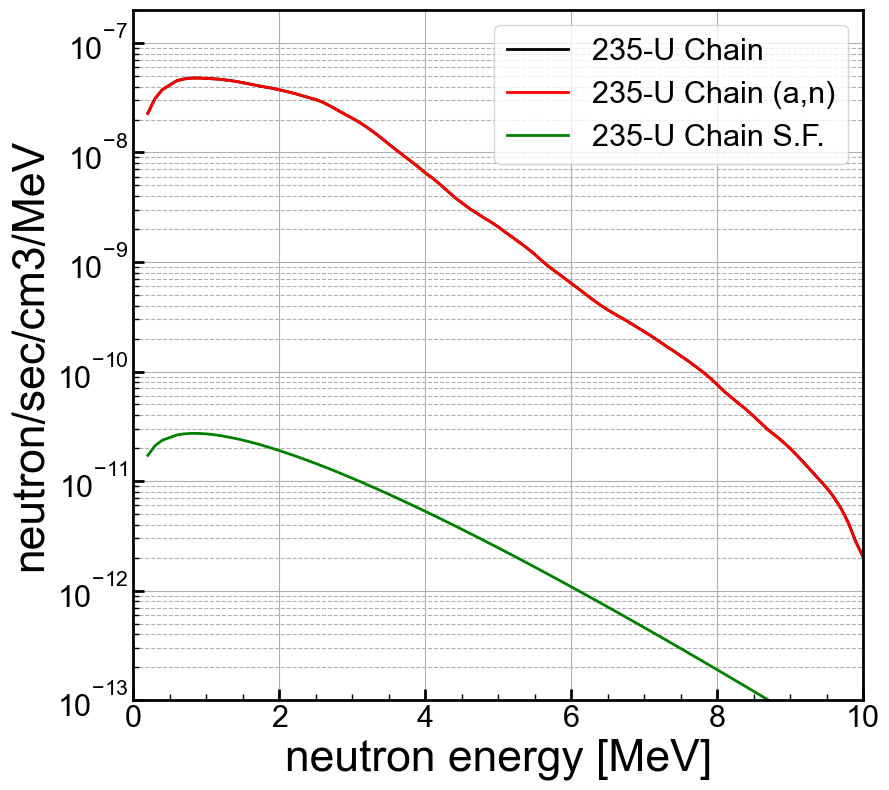

In [10]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

width=np.abs(np.diff(u235chainEn)[0])



ax1.plot(u235chainEn, u235chainRn/width,color='k',linestyle='-',label="235-U Chain")
ax1.plot(u235chainEn, u235chainANRn/width,color='r',linestyle='-',label="235-U Chain (a,n)")
ax1.plot(u235chainEn, u235chainSFRn/width,color='g',linestyle='-',label="235-U Chain S.F.")



#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-13
ymax = 2e-7


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [11]:
#test with SOURCES manual example
pube = pd.read_csv("data/raw_sources_IO/PuBe_summary.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (pube.head(10))

   Energy           a,n      S.F.        Total
0   12.00  0.000000e+00  0.003165     0.003165
1   11.75  0.000000e+00  0.004010     0.004010
2   11.50  0.000000e+00  0.005064     0.005064
3   11.25  1.620000e-16  0.006402     0.006402
4   11.00  1.419000e-15  0.008077     0.008077
5   10.75  1.283000e+02  0.010190   128.300000
6   10.50  5.044000e+02  0.012830   504.400000
7   10.00  1.563000e+03  0.020300  1563.000000
8    9.75  2.340000e+03  0.025490  2340.000000
9    9.50  3.004000e+03  0.031970  3004.000000


/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_77458/3696617366.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pube = pd.read_csv("data/raw_sources_IO/PuBe_summary.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \


In [12]:
pubeEn = np.asarray(pube['Energy'],dtype=float)
pubeRn = np.asarray(pube['Total'],dtype=float)
pubeANRn = np.asarray(pube['a,n'],dtype=float)
pubeSFRn = np.asarray(pube['S.F.'],dtype=float)

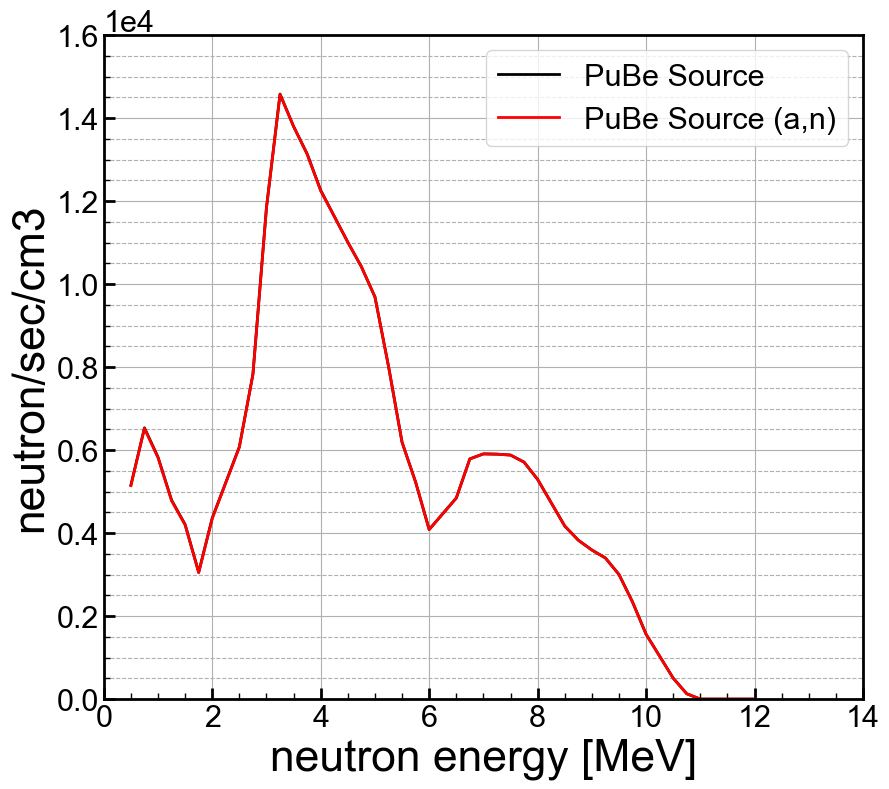

In [13]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

width=np.abs(np.diff(pubeEn)[0])



ax1.plot(pubeEn, pubeRn,color='k',linestyle='-',label="PuBe Source")
ax1.plot(pubeEn, pubeANRn,color='r',linestyle='-',label="PuBe Source (a,n)")




#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 0
ymax = 1.6e4


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 14) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) 

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [14]:
# functions

def integrate_df(df):
    # (left-sided rectangular integral)
    dE = -df['E'].diff(periods = -1)
    dE.iat[-1] = dE.iat[-2]
    A = df['spec']*dE
    return A.sum()

def maxwell(E, B):
    # height of Maxwell distribution for energy E (eV) and temperature T (K) related to B via B = 1/kT
    return 2*B*np.sqrt(B*E/np.pi)*np.exp(-B*E)

In [15]:
spec = pd.DataFrame()
spec['E']=th232hangEn
spec['spec']=th232hangRn
print(integrate_df(spec))

2.9539537636099998e-08


[1.416e-14 1.564e-14 1.721e-14 1.886e-14 2.057e-14 2.233e-14 2.494e-14
 4.042e-14 4.996e-14 5.990e-14 7.058e-14 8.283e-14 9.716e-14 1.114e-13
 1.476e-13 1.667e-13 1.879e-13 2.108e-13 2.344e-13 2.603e-13 2.869e-13
 3.458e-13 3.828e-13 4.296e-13 4.808e-13 5.437e-13 6.131e-13 6.825e-13
 8.918e-13 1.009e-12 1.131e-12 1.265e-12 1.410e-12 1.574e-12 1.739e-12
 2.122e-12 2.333e-12 2.557e-12 2.890e-12 3.265e-12 3.643e-12 4.036e-12
 5.313e-12 6.008e-12 6.788e-12 7.710e-12 8.823e-12 1.006e-11 1.139e-11
 1.457e-11 1.642e-11 1.852e-11 2.081e-11 2.286e-11 2.527e-11 2.771e-11
 3.338e-11 3.628e-11 3.915e-11 4.241e-11 4.549e-11 4.830e-11 5.164e-11
 6.007e-11 6.448e-11 6.932e-11 7.404e-11 7.924e-11 8.446e-11 8.998e-11
 1.010e-10 1.055e-10 1.097e-10 1.139e-10 1.174e-10 1.207e-10 1.231e-10
 1.249e-10 1.251e-10 1.257e-10 1.262e-10 1.255e-10 1.237e-10 1.206e-10
 1.024e-10 8.506e-11 6.256e-11]
0.09999999999999964
0.09999999999999964


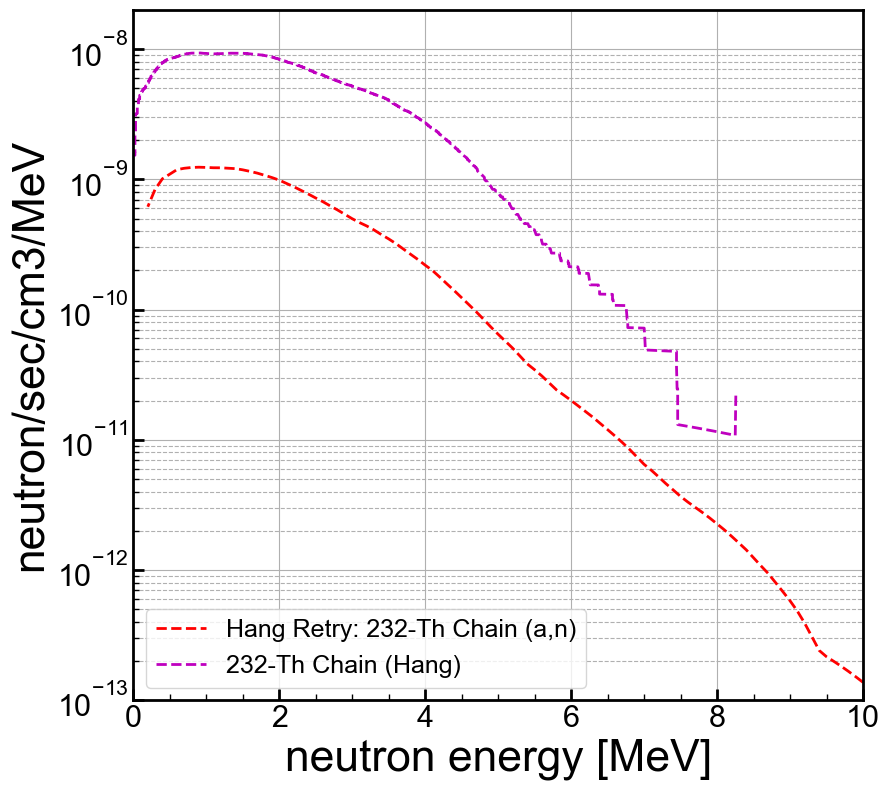

In [16]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(th232chainRn)

width=np.abs(np.diff(th232chainEn)[0])
widthH=np.abs(np.diff(th232hangEn)[0])
widthHR=np.abs(np.diff(th232chainEn_HangRetry)[0])

print(width)
print(widthHR)



ax1.plot(th232chainEn, th232chainANRn_HangRetry/widthHR,color='r',linestyle='--',label="Hang Retry: 232-Th Chain (a,n)")
ax1.plot(th232hangEn, th232hangRn,color='m',linestyle='--',label="232-Th Chain (Hang)")


#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-13
ymax = 2e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

3.1989e-11


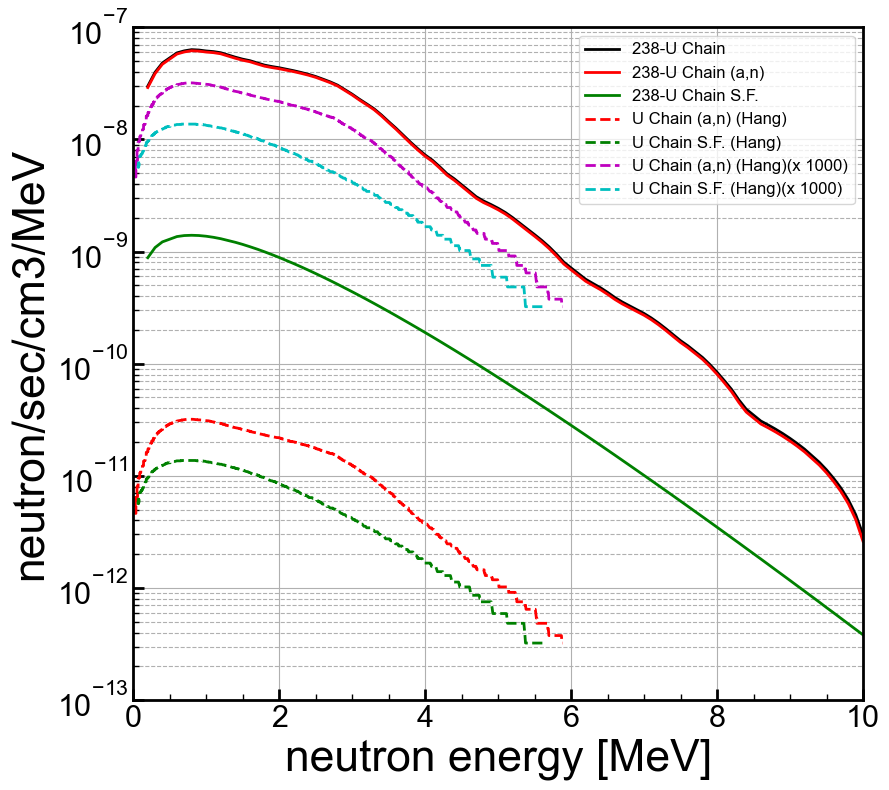

In [17]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


width=np.abs(np.diff(u238chainEn)[0])
widthH=np.max(np.diff(uANhangEn))
print(np.max(uANhangRn))
      


ax1.plot(u238chainEn, (21.097*u238chainANRn+u238chainSFRn)/width,color='k',linestyle='-',label="238-U Chain")
ax1.plot(u238chainEn, 21.097*u238chainANRn/width,color='r',linestyle='-',label="238-U Chain (a,n)")
ax1.plot(u238chainEn, u238chainSFRn/width,color='g',linestyle='-',label="238-U Chain S.F.")
#ax1.plot(uANhangEn, uANhangRn+uSFhangRn,color='r',linestyle='--',label="U Chain (a,n) (Hang)")
ax1.plot(uANhangEn, uANhangRn,color='r',linestyle='--',label="U Chain (a,n) (Hang)")
ax1.plot(uSFhangEn, uSFhangRn,color='g',linestyle='--',label="U Chain S.F. (Hang)")
ax1.plot(uANhangEn, uANhangRn*1000,color='m',linestyle='--',label="U Chain (a,n) (Hang)(x 1000)")
ax1.plot(uSFhangEn, uSFhangRn*1000,color='c',linestyle='--',label="U Chain S.F. (Hang)(x 1000)")


#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-13
ymax = 1e-7


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':12})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [18]:
spec = pd.DataFrame()
spec['E']=uANhangEn
spec['spec']=uANhangRn
print(integrate_df(spec))

7.8476263068e-11


[1.416e-14 1.564e-14 1.721e-14 1.886e-14 2.057e-14 2.233e-14 2.494e-14
 4.042e-14 4.996e-14 5.990e-14 7.058e-14 8.283e-14 9.716e-14 1.114e-13
 1.476e-13 1.667e-13 1.879e-13 2.108e-13 2.344e-13 2.603e-13 2.869e-13
 3.458e-13 3.828e-13 4.296e-13 4.808e-13 5.437e-13 6.131e-13 6.825e-13
 8.918e-13 1.009e-12 1.131e-12 1.265e-12 1.410e-12 1.574e-12 1.739e-12
 2.122e-12 2.333e-12 2.557e-12 2.890e-12 3.265e-12 3.643e-12 4.036e-12
 5.313e-12 6.008e-12 6.788e-12 7.710e-12 8.823e-12 1.006e-11 1.139e-11
 1.457e-11 1.642e-11 1.852e-11 2.081e-11 2.286e-11 2.527e-11 2.771e-11
 3.338e-11 3.628e-11 3.915e-11 4.241e-11 4.549e-11 4.830e-11 5.164e-11
 6.007e-11 6.448e-11 6.932e-11 7.404e-11 7.924e-11 8.446e-11 8.998e-11
 1.010e-10 1.055e-10 1.097e-10 1.139e-10 1.174e-10 1.207e-10 1.231e-10
 1.249e-10 1.251e-10 1.257e-10 1.262e-10 1.255e-10 1.237e-10 1.206e-10
 1.024e-10 8.506e-11 6.256e-11]
0.09999999999999964
0.09999999999999964


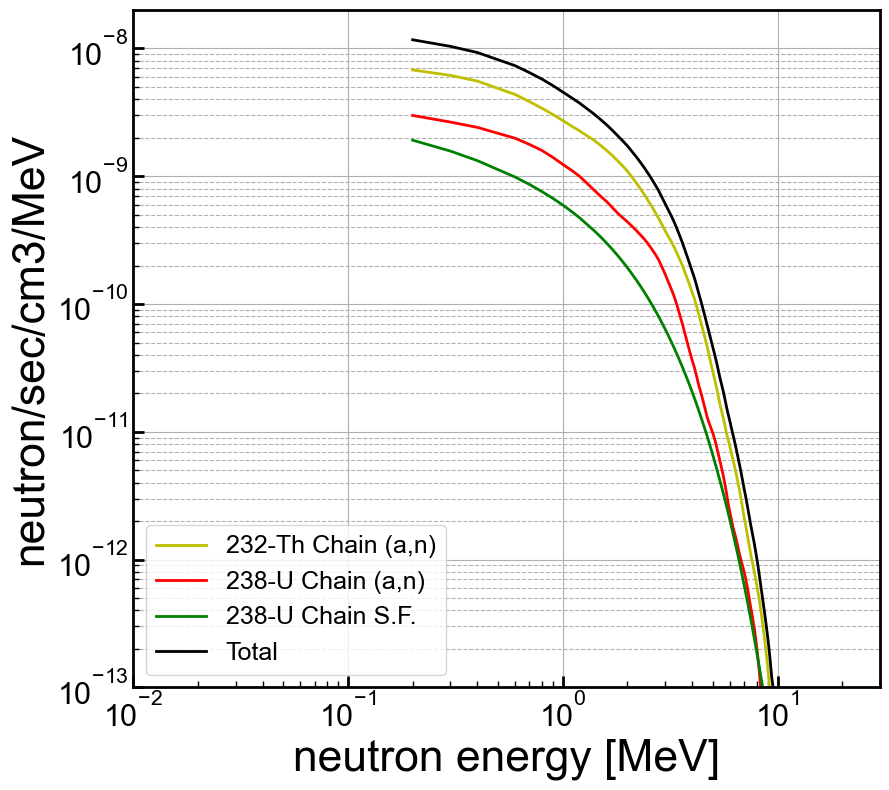

In [19]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(th232chainRn)

width=np.abs(np.diff(th232chainEn)[0])
widthH=np.abs(np.diff(th232hangEn)[0])
widthHR=np.abs(np.diff(th232chainEn_HangRetry)[0])

print(width)
print(widthHR)

jac = 1/(th232chainEn*np.log(10))

#multiply thorium by 5 because thorium seems to be 5x greater concentration:
#https://confluence.slac.stanford.edu/pages/viewpage.action?spaceKey=NEXUS&title=Model+Neutron+Spectrum&preview=/160010006/160139384/SNOLAB-STR-2007-003-NoriteRock-Radioactivity.pdf
ax1.plot(th232chainEn, 5*jac*th232chainANRn/width,color='y',linestyle='-',label="232-Th Chain (a,n)")
ax1.plot(u238chainEn, jac*u238chainANRn/width,color='r',linestyle='-',label="238-U Chain (a,n)")
ax1.plot(u238chainEn, jac*u238chainSFRn/width,color='g',linestyle='-',label="238-U Chain S.F.")
ax1.plot(th232chainEn, jac*(5*th232chainANRn+u238chainANRn+u238chainSFRn)/width,color='k',linestyle='-',label="Total")

#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-13
ymax = 2e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.01, 30) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()